<a href="https://colab.research.google.com/github/Shwetasaha/The_Nairobians/blob/master/1705941_Final_ML_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Nairobi_1705941.csv to Nairobi_1705941.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sb
import datetime as dt
import pylab
import scipy.stats as stats
from numpy import array

In [ ]:
df = pd.read_csv('Nairobi_1705941.csv')
df.shape

(50000, 47)

In [ ]:
dateColumns = ['document_create_date', 'document_create_date_norm', 'posting_date', 'posting_date_norm',
               'due_in_date', 'due_in_date_norm', 'order_create_date', 'order_date_norm', 
               'baseline_create_date', 'invoice_date_norm', 'shipping_date', 'clear_date',
               'clear_date_norm', 'discount_due_date_norm', 'document_create_date.1', 'days_past_duedate']


In [ ]:
df = pd.read_csv('Nairobi_1705941.csv', parse_dates = dateColumns)
df.head()

,acct_doc_header_id,company_id,doc_number,doc_number_norm,business_code,create_year,document_line_number,document_type,cust_number,cust_number_norm,customer_map_id,name_customer,division,document_create_date,document_create_date_norm,posting_date,posting_date_norm,posting_id,due_in_date,due_in_date_norm,order_create_date,order_date_norm,invoice_id,invoice_id_norm,baseline_create_date,invoice_date_norm,total_open_amount,total_open_amount_norm,cust_payment_terms,area_business,shipping_date,shipping_to,clear_date,clear_date_norm,reason_code,is_open_invoice,discount_due_date_norm,debit_credit_status,payment_method,document_create_date.1,invoice_currency,doc_id,actual_outstanding_amount,payment_amount,days_past_duedate,age_invoice,dispute_amount
0,542448984,60,44532254,44532254,enme9,NaN,NaN,RI,218996,218996,-1,end frame,NaN,2018-12-26,2018-12-26,NaT,NaT,NaN,NaT,NaT,NaT,NaT,44532254,44532254,NaT,NaT,0.0,0.0,75,NaN,NaT,NaN,2019-03-12,2019-03-12,NaN,0,NaT,NaN,NaN,NaT,4591.26,542448984,4591.26,4591.26,1,76,NaN
1,542968426,60,45828344,45828344,pier9,NaN,NaN,RI,218994,218994,-1,pied piper,NaN,2019-01-31,2019-01-31,NaT,NaT,NaN,NaT,NaT,NaT,NaT,45828344,45828344,NaT,NaT,0.0,0.0,60,NaN,NaT,NaN,2019-04-03,2019-04-03,NaN,0,NaT,NaN,NaN,NaT,1410.89,542968426,1410.89,1410.89,2,62,NaN
2,541635255,60,42740911,42740911,enme9,NaN,NaN,RI,218996,218996,-1,end frame,NaN,2018-11-01,2018-11-01,NaT,NaT,NaN,NaT,NaT,NaT,NaT,42740911,42740911,NaT,NaT,0.0,0.0,75,NaN,NaT,NaN,2019-01-16,2019-01-16,NaN,0,NaT,NaN,NaN,NaT,6031.86,541635255,6031.86,6031.86,1,76,NaN
3,534035786,60,31914054,31914054,minc10,NaN,NaN,RI,228453,228453,-1,middle man inc,NaN,2017-10-11,2017-10-11,NaT,NaT,NaN,NaT,NaT,NaT,NaT,31914054,31914054,2017-10-11,2017-10-11,0.0,0.0,60,NaN,2017-10-11,NaN,2017-11-16,2017-11-16,NaN,0,NaT,NaN,NaN,NaT,4073.08,534035786,4073.08,4073.08,-24,36,NaN
4,538626172,60,38636507,38636507,Piat8,NaN,NaN,RI,219001,219001,-1,PiperChat,NaN,2018-05-31,2018-05-31,NaT,NaT,NaN,NaT,NaT,NaT,NaT,38636507,38636507,NaT,NaT,0.0,0.0,60,NaN,NaT,NaN,2018-08-01,2018-08-01,NaN,0,NaT,NaN,NaN,NaT,7342.76,538626172,7342.76,7342.76,2,62,NaN


In [ ]:
df.shape

(50000, 47)

In [ ]:
df.describe()

,acct_doc_header_id,company_id,doc_number,doc_number_norm,create_year,document_line_number,cust_number,cust_number_norm,customer_map_id,division,posting_id,invoice_id,invoice_id_norm,total_open_amount,total_open_amount_norm,cust_payment_terms,area_business,shipping_to,reason_code,is_open_invoice,debit_credit_status,payment_method,invoice_currency,doc_id,actual_outstanding_amount,payment_amount,age_invoice,dispute_amount
count,5.000000e+04,50000.0,5.000000e+04,5.000000e+04,0.0,0.0,50000.000000,50000.000000,50000.0,0.0,0.0,5.000000e+04,5.000000e+04,50000.000000,50000.000000,50000.000000,0.0,0.0,0.0,50000.00000,0.0,0.0,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,50000.000000,0.0
mean,5.386824e+08,60.0,3.892409e+07,3.892409e+07,NaN,NaN,223546.424260,223546.424260,-1.0,NaN,NaN,3.892409e+07,3.892409e+07,822.787207,822.787207,61.057660,NaN,NaN,NaN,0.07662,NaN,NaN,8.436944e+03,5.386824e+08,8.436944e+03,7.327910e+03,69.583760,NaN
std,4.192388e+06,0.0,6.687719e+06,6.687719e+06,NaN,NaN,4435.534864,4435.534864,0.0,NaN,NaN,6.687719e+06,6.687719e+06,5000.475332,5000.475332,3.565954,NaN,NaN,NaN,0.26599,NaN,NaN,1.636377e+04,4.192388e+06,1.636377e+04,1.585837e+04,33.732537,NaN
min,5.315169e+08,60.0,2.832879e+07,2.832879e+07,NaN,NaN,218994.000000,218994.000000,-1.0,NaN,NaN,2.832879e+07,2.832879e+07,0.000000,0.000000,0.000000,NaN,NaN,NaN,0.00000,NaN,NaN,1.420000e+00,5.315169e+08,1.420000e+00,0.000000e+00,4.000000,NaN
25%,5.353380e+08,60.0,3.291266e+07,3.291266e+07,NaN,NaN,218997.000000,218997.000000,-1.0,NaN,NaN,3.291266e+07,3.291266e+07,0.000000,0.000000,60.000000,NaN,NaN,NaN,0.00000,NaN,NaN,1.691003e+03,5.353380e+08,1.691003e+03,9.120000e+02,59.000000,NaN
50%,5.386256e+08,60.0,3.862609e+07,3.862609e+07,NaN,NaN,226546.000000,226546.000000,-1.0,NaN,NaN,3.862609e+07,3.862609e+07,0.000000,0.000000,60.000000,NaN,NaN,NaN,0.00000,NaN,NaN,5.016880e+03,5.386256e+08,5.016880e+03,3.856430e+03,62.000000,NaN
75%,5.423606e+08,60.0,4.428858e+07,4.428858e+07,NaN,NaN,228098.000000,228098.000000,-1.0,NaN,NaN,4.428858e+07,4.428858e+07,0.000000,0.000000,60.000000,NaN,NaN,NaN,0.00000,NaN,NaN,1.134390e+04,5.423606e+08,1.134390e+04,1.000012e+04,68.000000,NaN
max,5.459100e+08,60.0,5.153543e+07,5.153543e+07,NaN,NaN,229624.000000,229624.000000,-1.0,NaN,NaN,5.153543e+07,5.153543e+07,484093.920000,484093.920000,75.000000,NaN,NaN,NaN,1.00000,NaN,NaN,2.166982e+06,5.459100e+08,2.166982e+06,2.166982e+06,618.000000,NaN


Checking Data Types


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 47 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   acct_doc_header_id         50000 non-null  int64         
 1   company_id                 50000 non-null  int64         
 2   doc_number                 50000 non-null  int64         
 3   doc_number_norm            50000 non-null  int64         
 4   business_code              50000 non-null  object        
 5   create_year                0 non-null      float64       
 6   document_line_number       0 non-null      float64       
 7   document_type              50000 non-null  object        
 8   cust_number                50000 non-null  int64         
 9   cust_number_norm           50000 non-null  int64         
 10  customer_map_id            50000 non-null  int64         
 11  name_customer              50000 non-null  object        
 12  divi

In [ ]:
df['days_past_duedate'] = df['days_past_duedate'].astype('int64')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 47 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   acct_doc_header_id         50000 non-null  int64         
 1   company_id                 50000 non-null  int64         
 2   doc_number                 50000 non-null  int64         
 3   doc_number_norm            50000 non-null  int64         
 4   business_code              50000 non-null  object        
 5   create_year                0 non-null      float64       
 6   document_line_number       0 non-null      float64       
 7   document_type              50000 non-null  object        
 8   cust_number                50000 non-null  int64         
 9   cust_number_norm           50000 non-null  int64         
 10  customer_map_id            50000 non-null  int64         
 11  name_customer              50000 non-null  object        
 12  divi

In [ ]:
df.describe()

,acct_doc_header_id,company_id,doc_number,doc_number_norm,create_year,document_line_number,cust_number,cust_number_norm,customer_map_id,division,posting_id,invoice_id,invoice_id_norm,total_open_amount,total_open_amount_norm,cust_payment_terms,area_business,shipping_to,reason_code,is_open_invoice,debit_credit_status,payment_method,invoice_currency,doc_id,actual_outstanding_amount,payment_amount,days_past_duedate,age_invoice,dispute_amount
count,5.000000e+04,50000.0,5.000000e+04,5.000000e+04,0.0,0.0,50000.000000,50000.000000,50000.0,0.0,0.0,5.000000e+04,5.000000e+04,50000.000000,50000.000000,50000.000000,0.0,0.0,0.0,50000.00000,0.0,0.0,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,50000.000000,50000.000000,0.0
mean,5.386824e+08,60.0,3.892409e+07,3.892409e+07,NaN,NaN,223546.424260,223546.424260,-1.0,NaN,NaN,3.892409e+07,3.892409e+07,822.787207,822.787207,61.057660,NaN,NaN,NaN,0.07662,NaN,NaN,8.436944e+03,5.386824e+08,8.436944e+03,7.327910e+03,8.526100,69.583760,NaN
std,4.192388e+06,0.0,6.687719e+06,6.687719e+06,NaN,NaN,4435.534864,4435.534864,0.0,NaN,NaN,6.687719e+06,6.687719e+06,5000.475332,5000.475332,3.565954,NaN,NaN,NaN,0.26599,NaN,NaN,1.636377e+04,4.192388e+06,1.636377e+04,1.585837e+04,33.777782,33.732537,NaN
min,5.315169e+08,60.0,2.832879e+07,2.832879e+07,NaN,NaN,218994.000000,218994.000000,-1.0,NaN,NaN,2.832879e+07,2.832879e+07,0.000000,0.000000,0.000000,NaN,NaN,NaN,0.00000,NaN,NaN,1.420000e+00,5.315169e+08,1.420000e+00,0.000000e+00,-69.000000,4.000000,NaN
25%,5.353380e+08,60.0,3.291266e+07,3.291266e+07,NaN,NaN,218997.000000,218997.000000,-1.0,NaN,NaN,3.291266e+07,3.291266e+07,0.000000,0.000000,60.000000,NaN,NaN,NaN,0.00000,NaN,NaN,1.691003e+03,5.353380e+08,1.691003e+03,9.120000e+02,-1.000000,59.000000,NaN
50%,5.386256e+08,60.0,3.862609e+07,3.862609e+07,NaN,NaN,226546.000000,226546.000000,-1.0,NaN,NaN,3.862609e+07,3.862609e+07,0.000000,0.000000,60.000000,NaN,NaN,NaN,0.00000,NaN,NaN,5.016880e+03,5.386256e+08,5.016880e+03,3.856430e+03,2.000000,62.000000,NaN
75%,5.423606e+08,60.0,4.428858e+07,4.428858e+07,NaN,NaN,228098.000000,228098.000000,-1.0,NaN,NaN,4.428858e+07,4.428858e+07,0.000000,0.000000,60.000000,NaN,NaN,NaN,0.00000,NaN,NaN,1.134390e+04,5.423606e+08,1.134390e+04,1.000012e+04,6.000000,68.000000,NaN
max,5.459100e+08,60.0,5.153543e+07,5.153543e+07,NaN,NaN,229624.000000,229624.000000,-1.0,NaN,NaN,5.153543e+07,5.153543e+07,484093.920000,484093.920000,75.000000,NaN,NaN,NaN,1.00000,NaN,NaN,2.166982e+06,5.459100e+08,2.166982e+06,2.166982e+06,558.000000,618.000000,NaN


In [ ]:
column_no = df.count()
print(column_no)

acct_doc_header_id           50000
company_id                   50000
doc_number                   50000
doc_number_norm              50000
business_code                50000
create_year                      0
document_line_number             0
document_type                50000
cust_number                  50000
cust_number_norm             50000
customer_map_id              50000
name_customer                50000
division                         0
document_create_date         50000
document_create_date_norm    50000
posting_date                     0
posting_date_norm                0
posting_id                       0
due_in_date                      0
due_in_date_norm                 0
order_create_date                0
order_date_norm                  0
invoice_id                   50000
invoice_id_norm              50000
baseline_create_date         10488
invoice_date_norm            10488
total_open_amount            50000
total_open_amount_norm       50000
cust_payment_terms  

Analyzing the missing values

In [ ]:
df.isnull().sum()   

acct_doc_header_id               0
company_id                       0
doc_number                       0
doc_number_norm                  0
business_code                    0
create_year                  50000
document_line_number         50000
document_type                    0
cust_number                      0
cust_number_norm                 0
customer_map_id                  0
name_customer                    0
division                     50000
document_create_date             0
document_create_date_norm        0
posting_date                 50000
posting_date_norm            50000
posting_id                   50000
due_in_date                  50000
due_in_date_norm             50000
order_create_date            50000
order_date_norm              50000
invoice_id                       0
invoice_id_norm                  0
baseline_create_date         39512
invoice_date_norm            39512
total_open_amount                0
total_open_amount_norm           0
cust_payment_terms  

Visualizing missing columns

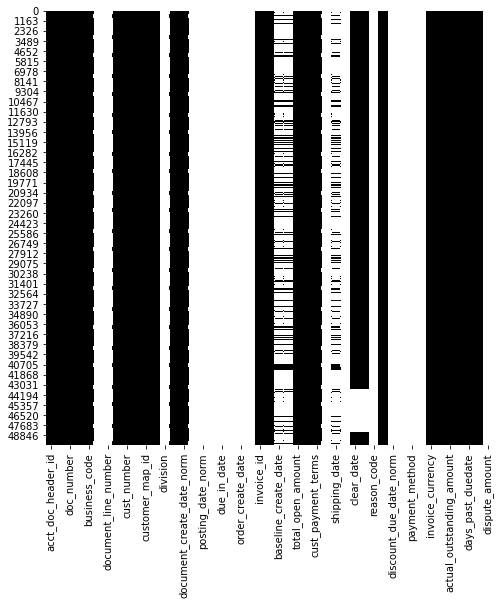

In [ ]:
plt.figure(figsize=(8,8))
sb.heatmap(df.isnull(), cbar = False, cmap = 'binary_r')

Dropping columns with no information

In [ ]:
duplicate_col = set()
for i in range(df.shape[1]):
        col_1 = df.iloc[:, i]
        for j in range(i + 1, df.shape[1]):
            col_2 = df.iloc[:, j]
            if col_1.equals(col_2):
                duplicate_col.add(df.columns.values[j])
print('Duplicate Column Names: \n ')
for col in duplicate_col:
        print(col)

Duplicate Column Names: 
 
document_create_date_norm
cust_number_norm
due_in_date
posting_id
due_in_date_norm
document_line_number
posting_date_norm
document_create_date.1
order_date_norm
total_open_amount_norm
doc_id
payment_method
debit_credit_status
area_business
invoice_date_norm
order_create_date
doc_number_norm
reason_code
actual_outstanding_amount
discount_due_date_norm
division
invoice_id_norm
dispute_amount
invoice_id
shipping_to
clear_date_norm


In [ ]:
print(duplicate_col)

{'document_create_date_norm', 'cust_number_norm', 'due_in_date', 'posting_id', 'due_in_date_norm', 'document_line_number', 'posting_date_norm', 'document_create_date.1', 'order_date_norm', 'total_open_amount_norm', 'doc_id', 'payment_method', 'debit_credit_status', 'area_business', 'invoice_date_norm', 'order_create_date', 'doc_number_norm', 'reason_code', 'actual_outstanding_amount', 'discount_due_date_norm', 'division', 'invoice_id_norm', 'dispute_amount', 'invoice_id', 'shipping_to', 'clear_date_norm'}


In [ ]:
rows = df.count()
df = df.loc[:, rows.astype('bool')]
df.count()

acct_doc_header_id           50000
company_id                   50000
doc_number                   50000
doc_number_norm              50000
business_code                50000
document_type                50000
cust_number                  50000
cust_number_norm             50000
customer_map_id              50000
name_customer                50000
document_create_date         50000
document_create_date_norm    50000
invoice_id                   50000
invoice_id_norm              50000
baseline_create_date         10488
invoice_date_norm            10488
total_open_amount            50000
total_open_amount_norm       50000
cust_payment_terms           50000
shipping_date                10488
clear_date                   45000
clear_date_norm              45000
is_open_invoice              50000
invoice_currency             50000
doc_id                       50000
actual_outstanding_amount    50000
payment_amount               50000
days_past_duedate            50000
age_invoice         

In [ ]:
def checkDuplicate(x, y):
    return (True if len(df[df[x] != df[y]]) == 0 else False)

In [ ]:
# check for duplicate columns

print(checkDuplicate('total_open_amount', 'total_open_amount_norm'))
print(checkDuplicate('doc_number', 'doc_number_norm'))
print(checkDuplicate('cust_number', 'cust_number_norm'))
print(checkDuplicate('invoice_id', 'invoice_id_norm'))
print(checkDuplicate('doc_number', 'doc_number_norm'))
print(checkDuplicate('document_create_date', 'document_create_date_norm'))
print(checkDuplicate('baseline_create_date', 'invoice_date_norm'))
print(checkDuplicate('clear_date', 'clear_date_norm'))
print(checkDuplicate('total_open_amount', 'actual_outstanding_amount'))

True
True
True
True
True
True
False
False
False


'False' are not duplicates, but they may be co-related, which will be removed later on

In [ ]:
df.drop(['total_open_amount_norm', 'doc_number_norm', 'cust_number_norm', 'invoice_id_norm',
         'doc_number_norm','document_create_date_norm'], inplace = True, axis = 1)
df.shape

(50000, 24)

Finally, we got 24 meaningful features from our dataset but they are not necessarily essential. We have to select the essential features from them.

In [ ]:
unique_cust = df['name_customer'].unique()
print(unique_cust)
len(unique_cust)

['end frame' 'pied piper' 'middle man inc' 'PiperChat'
 'skynetpwc softwares' 'nucleus' 'cvMaker corp' 'see food' 'hooli'
 'Weyland-Yutani corp' 'xyz softwares' 'LEXCORP' 'CZERKA CORP' 'kais corp'
 'hooli xyz' 'ABC Softwares' 'mdassist pvt ltd' 'aviato'
 'HYPERION CORPORATION' 'Pathak networks' 'Primatech industries'
 'system ops' 'Cyberdyne Systems Corporation' 'Tyrell Corporation'
 'bochmanedy' 'Fatboy Industries' 'randstad' 'chatmet' 'arp softwares'
 'AT&T' 'walmart' 'VERIDIAN DYNAMICS' 'medi help corporation'
 'PAGE INDUSTRIES' 'deep scraper' 'sam kaiser' 'ABSTERGO INDUSTRIES'
 'johnsons and johnsons' 'codeU' 'UMBRELLA CORP' 'wtf foods'
 'Veidt Industries' 'OMNI CONSUMER PRODUCTS ' 'EVIL CORP'
 'WOLFRAM AND HART' 'media tech' 'Soylent Corporation' 'raviga capital'
 'ERT companies' 'RUPTURE FARMS']


50

In [ ]:
print("Name:",len(df['name_customer'].unique()))
print("cust_number:",len(df['cust_number'].unique()))

Name: 50
cust_number: 50


There are unique 50 customers.

**Analysis and Visualization of the Dataset**


---



In [ ]:
# checking which fields are na
# Detect missing values.

# Return a boolean same-sized object indicating if the values are NA. NA values, such as None or numpy.NaN, gets mapped to True values.
# Everything else gets mapped to False values. 
# Characters such as empty strings '' or numpy.inf are not considered NA values (unless you set pandas.options.mode.use_inf_as_na = True).
df.isna()


,acct_doc_header_id,company_id,doc_number,business_code,document_type,cust_number,customer_map_id,name_customer,document_create_date,invoice_id,baseline_create_date,invoice_date_norm,total_open_amount,cust_payment_terms,shipping_date,clear_date,clear_date_norm,is_open_invoice,invoice_currency,doc_id,actual_outstanding_amount,payment_amount,days_past_duedate,age_invoice
0,False,False,False,False,False,False,False,False,False,False,True,True,False,False,True,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,True,True,False,False,True,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,True,False,False,True,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,True,False,False,True,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,False,False,False,False,False,False,False,False,False,False,True,True,False,False,True,False,False,False,False,False,False,False,False,False
49996,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
49997,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
49998,False,False,False,False,False,False,False,False,False,False,True,True,False,False,True,False,False,False,False,False,False,False,False,False


In [ ]:
df.isna().sum()

acct_doc_header_id               0
company_id                       0
doc_number                       0
business_code                    0
document_type                    0
cust_number                      0
customer_map_id                  0
name_customer                    0
document_create_date             0
invoice_id                       0
baseline_create_date         39512
invoice_date_norm            39512
total_open_amount                0
cust_payment_terms               0
shipping_date                39512
clear_date                    5000
clear_date_norm               5000
is_open_invoice                  0
invoice_currency                 0
doc_id                           0
actual_outstanding_amount        0
payment_amount                   0
days_past_duedate                0
age_invoice                      0
dtype: int64

In [ ]:
# To detect NaN values numpy uses np.isnan().

# To detect NaN values pandas uses either .isna() or .isnull().
# The NaN values are inherited from the fact that pandas is built on top of numpy,while the two functions' names originate from R's DataFrames, 
# whose structure and functionality pandas tried to mimic.

df.isnull().sum  

<bound method DataFrame.sum of        acct_doc_header_id  company_id  ...  days_past_duedate  age_invoice
0                   False       False  ...              False        False
1                   False       False  ...              False        False
2                   False       False  ...              False        False
3                   False       False  ...              False        False
4                   False       False  ...              False        False
...                   ...         ...  ...                ...          ...
49995               False       False  ...              False        False
49996               False       False  ...              False        False
49997               False       False  ...              False        False
49998               False       False  ...              False        False
49999               False       False  ...              False        False

[50000 rows x 24 columns]>

Bar plotting for most frequent buyers using seaborn.


Text(0.5, 1.0, 'Frequent Customers')

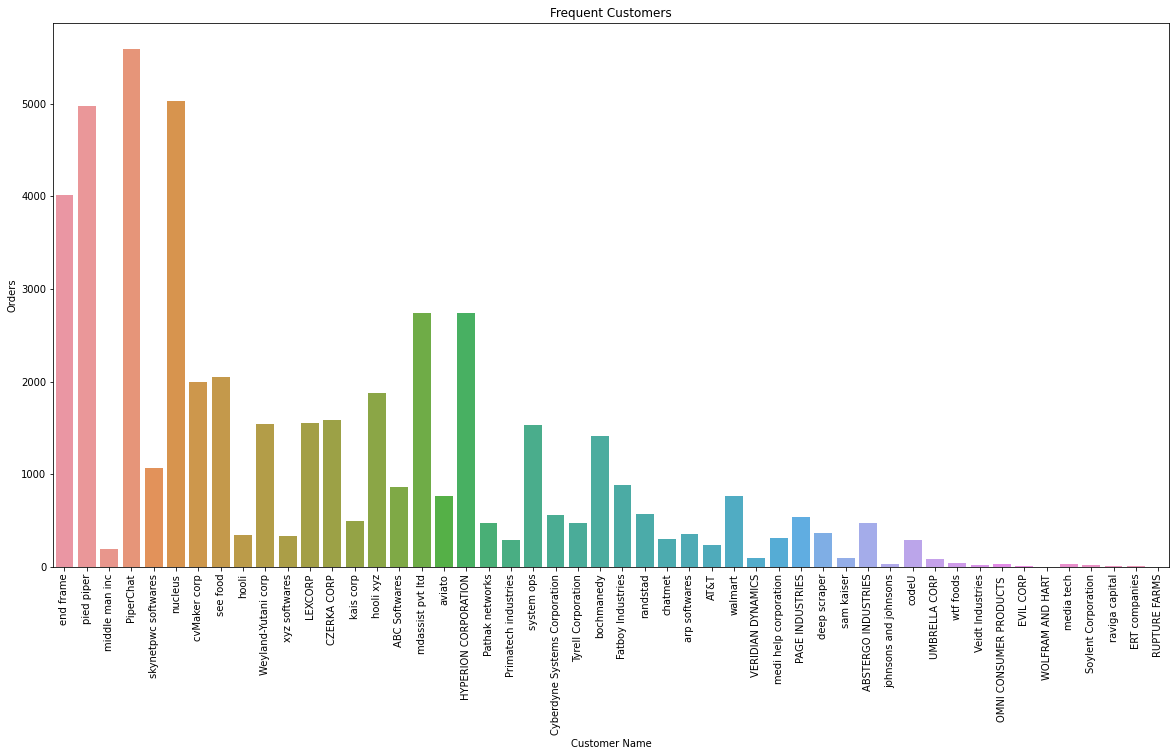

In [ ]:
plt.figure(figsize = (20,10))
chart = sb.countplot(x = 'name_customer',data = df)
chart.set_xticklabels(chart.get_xticklabels(), rotation = 90)
chart.set(xlabel='Customer Name', ylabel='Orders')
chart.set_title('Frequent Customers')

Top investors visualization

In [ ]:
plt.figure(figsize = (20,10))
top_investor_grp = ['name_customer', 'payment_amount']
top_investors = df.loc[:,top_investor_grp].groupby('name_customer', as_index=False).sum().sort_values('payment_amount', ascending = False)
top_investors.head()

,name_customer,payment_amount
40,pied piper,39793747.80
30,end frame,35876981.06
13,PiperChat,35198860.72
39,nucleus,30699138.92
35,mdassist pvt ltd,17606761.79


<Figure size 1440x720 with 0 Axes>

Highest Investors

Text(0.5, 1.0, 'Highest Investors')

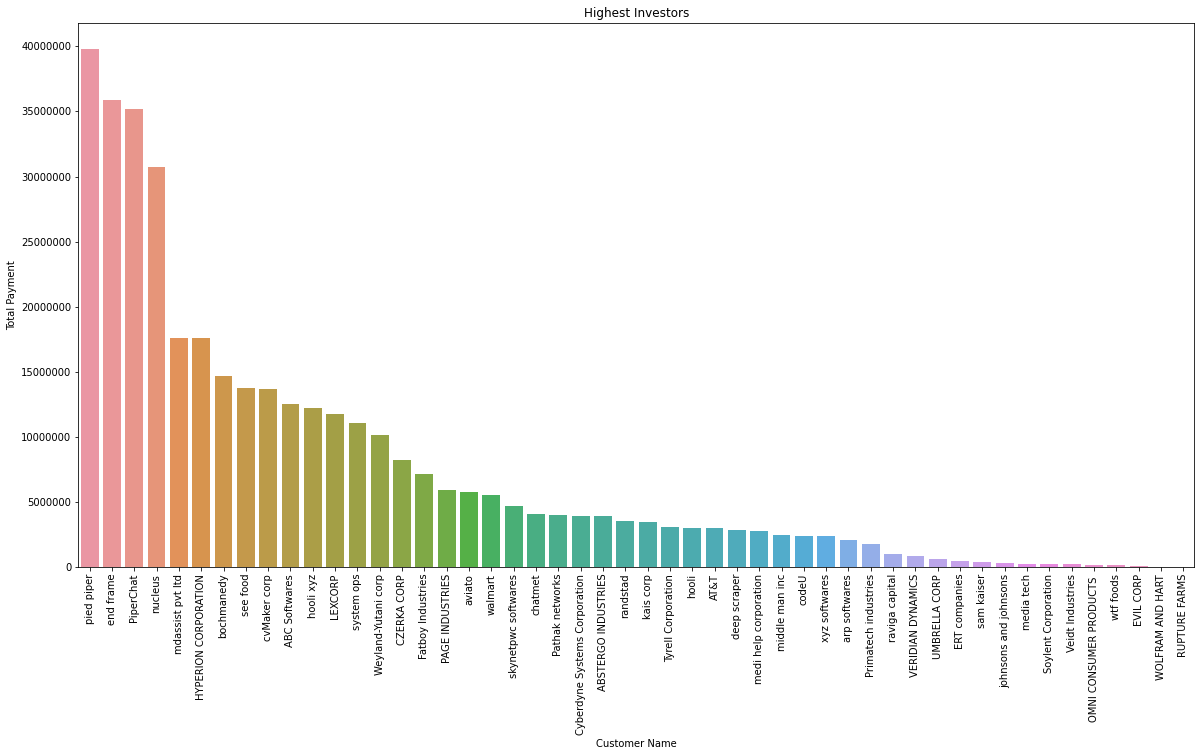

In [ ]:
plt.figure(figsize = (20,10))
chart = sb.barplot(data = top_investors, x = 'name_customer', y = 'payment_amount')
chart.set_xticklabels(chart.get_xticklabels(), rotation = 90)
chart.set(xlabel='Customer Name', ylabel='Total Payment')
chart.ticklabel_format(style='plain', axis='y',useOffset=False)
chart.set_title('Highest Investors')

In [ ]:
investors = df.loc[df['total_open_amount'] > 0, ['name_customer','total_open_amount','actual_outstanding_amount']]
investors.head()


,name_customer,total_open_amount,actual_outstanding_amount
43555,pied piper,582.71,582.71
43556,pied piper,13466.69,13466.69
43558,nucleus,732.98,732.98
43559,pied piper,3022.33,3022.33
43560,system ops,768.93,768.93


In [ ]:
investors =investors.groupby('name_customer').sum().head()
investors = investors.reset_index()
investors

,name_customer,total_open_amount,actual_outstanding_amount
0,ABC Softwares,1487005.75,1487005.75
1,ABSTERGO INDUSTRIES,117331.37,117331.37
2,AT&T,238641.16,238641.16
3,CZERKA CORP,866649.40,866649.40
4,Cyberdyne Systems Corporation,304244.58,332065.21


Investor ABC company owes maximum payment. Following is for customers with maximum payment amount pending.

Text(0.5, 1.0, 'Customers with Pending Payment')

<Figure size 1440x720 with 0 Axes>

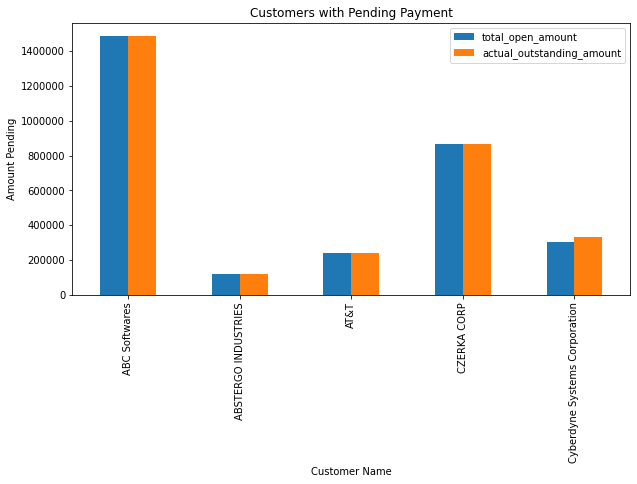

In [ ]:
plt.figure(figsize = (20,10))
chart = investors.plot(x = 'name_customer', y = ['total_open_amount', 'actual_outstanding_amount'],
                                figsize = (10,5), kind = 'bar')
chart.set_xticklabels(chart.get_xticklabels(), rotation = 90)
chart.set(xlabel='Customer Name', ylabel='Amount Pending')
chart.ticklabel_format(style='plain', axis='y',useOffset=False)
chart.set_title('Customers with Pending Payment')


In [ ]:
year_analysis = df[['payment_amount','clear_date']].dropna()
year_analysis['clear_year'] = pd.DatetimeIndex(year_analysis['clear_date']).year
year_analysis = year_analysis.drop('clear_date', axis = 1).groupby('clear_year', as_index = False).sum()
year_analysis


,clear_year,payment_amount
0,2017,8.357197e+07
1,2018,1.864741e+08
2,2019,9.608908e+07


Revenue distribution pie chart. 

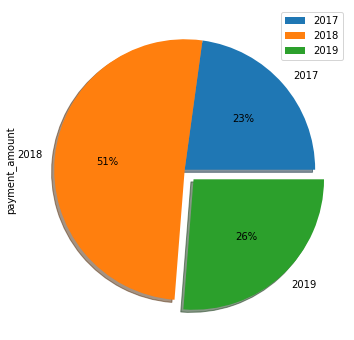

In [ ]:
explode = [0, 0, 0.1]
pie = year_analysis.plot(y = 'payment_amount', labels = year_analysis['clear_year'], kind = 'pie',
                         shadow = True, explode = explode, autopct = '%1.0f%%', figsize = (14,6))

Maximum was in the year 2018

([<matplotlib.axis.YTick at 0x7f235f6660b8>,
 <a list of 2 Text major ticklabel objects>)

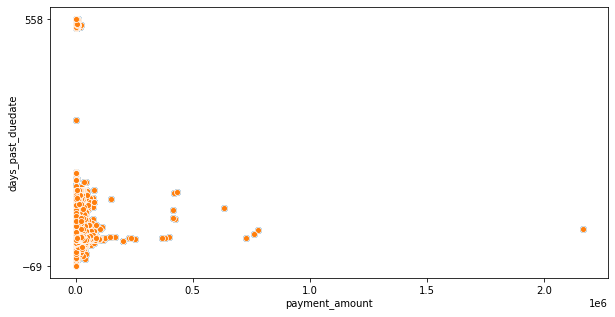

In [ ]:
plt.figure(figsize = (10,5))
plt.scatter(df.payment_amount,df.days_past_duedate)
ax = sb.scatterplot(data = df, x = 'payment_amount', y = 'days_past_duedate')
chart.set(xlabel='Payment Amount', ylabel='Days Past Due-Date')
chart.ticklabel_format(style='plain', axis='y',useOffset=False)
chart.set_title('Customers who passed Due-Date')
plt.yticks([df['days_past_duedate'].min(), df['days_past_duedate'].max()])

**Feature Engineering & Selecting Features for the Model**

Plot analysis function

In [ ]:
def plotter_analyser(df,col):
    plt.figure(figsize=(16, 4))
    
    # Histogram
    plt.subplot(1, 3, 1)
    sb.distplot(df[col], kde = True)
    plt.title(f'Distribution for {col}')
    
    # Probability plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[col], dist = 'norm', plot = pylab)
    plt.ylabel(f'Probability Plot for {col}')
    
    # Boxplot
    plt.subplot(1, 3, 3)
    sb.boxplot(y = df[col])
    plt.title(f'Boxplot for {col}')

As we keep the duplicate row values. Now we will remove 2nd payment as we are working for the first payement only.

In [ ]:
df = df.sort_values('clear_date').drop_duplicates('invoice_id', keep = 'first')
df.head()

,acct_doc_header_id,company_id,doc_number,business_code,document_type,cust_number,customer_map_id,name_customer,document_create_date,invoice_id,baseline_create_date,invoice_date_norm,total_open_amount,cust_payment_terms,shipping_date,clear_date,clear_date_norm,is_open_invoice,invoice_currency,doc_id,actual_outstanding_amount,payment_amount,days_past_duedate,age_invoice
40665,531519291,60,28341281,minc10,RI,228453,-1,middle man inc,2017-05-01,28341281,2017-05-01,2017-05-01,0.0,60,2017-05-01,2017-06-09,2017-06-09,0,29705.48,531519291,29705.48,10079.91,83,143
40666,531519440,60,28342790,jons3,RI,228111,-1,johnsons and johnsons,2017-05-01,28342790,2017-05-01,2017-05-01,0.0,60,2017-05-01,2017-06-12,2017-06-12,0,1848.30,531519440,1848.30,1396.70,112,172
25877,531533076,60,28364354,holi10,RI,218995,-1,hooli,2017-05-02,28364354,2017-05-02,2017-05-02,0.0,60,2017-05-02,2017-06-15,2017-06-15,0,49004.18,531533076,49004.18,49004.18,88,148
28200,531519166,60,28339211,minc10,RI,228453,-1,middle man inc,2017-05-01,28339211,2017-05-01,2017-05-01,0.0,60,2017-05-01,2017-06-15,2017-06-15,0,36376.43,531519166,36376.43,36376.43,89,149
49519,531596586,60,28479145,minc10,RI,228453,-1,middle man inc,2017-05-08,28479145,2017-05-08,2017-05-08,0.0,60,2017-05-08,2017-06-15,2017-06-15,0,37416.03,531596586,37416.03,37416.03,82,142


In [ ]:
df.shape

(47110, 24)

Removing Constant Features or columns

In [ ]:
print(df.shape)
constant = df.columns[df.nunique() <= 1]
print(constant)

(47110, 24)
Index(['company_id', 'document_type', 'customer_map_id'], dtype='object')


In [ ]:
df = df.drop(constant, axis = 1)
print(df.shape)


(47110, 21)


In [ ]:
corr = df.corr(method ='pearson')
corr

,acct_doc_header_id,doc_number,cust_number,invoice_id,total_open_amount,cust_payment_terms,is_open_invoice,invoice_currency,doc_id,actual_outstanding_amount,payment_amount,days_past_duedate,age_invoice
acct_doc_header_id,1.000000,0.994366,-0.079942,0.994366,0.137886,0.186728,0.456231,-0.016094,1.000000,-0.016094,-0.056053,-0.447806,-0.428716
doc_number,0.994366,1.000000,-0.083204,1.000000,0.162619,0.180984,0.507729,-0.017336,0.994366,-0.017336,-0.065099,-0.428812,-0.410301
cust_number,-0.079942,-0.083204,1.000000,-0.083204,-0.016370,-0.305741,-0.061536,-0.012287,-0.079942,-0.012287,-0.005965,-0.001189,-0.033525
invoice_id,0.994366,1.000000,-0.083204,1.000000,0.162619,0.180984,0.507729,-0.017336,0.994366,-0.017336,-0.065099,-0.428812,-0.410301
total_open_amount,0.137886,0.162619,-0.016370,0.162619,1.000000,0.060635,0.416165,0.232035,0.137886,0.232035,-0.077325,-0.097660,-0.091391
cust_payment_terms,0.186728,0.180984,-0.305741,0.180984,0.060635,1.000000,0.078093,0.028635,0.186728,0.028635,0.008651,-0.066671,0.038988
is_open_invoice,0.456231,0.507729,-0.061536,0.507729,0.416165,0.078093,1.000000,-0.006644,0.456231,-0.006644,-0.135886,-0.263295,-0.255423
invoice_currency,-0.016094,-0.017336,-0.012287,-0.017336,0.232035,0.028635,-0.006644,1.000000,-0.016094,1.000000,0.947823,0.032581,0.035657
doc_id,1.000000,0.994366,-0.079942,0.994366,0.137886,0.186728,0.456231,-0.016094,1.000000,-0.016094,-0.056053,-0.447806,-0.428716
actual_outstanding_amount,-0.016094,-0.017336,-0.012287,-0.017336,0.232035,0.028635,-0.006644,1.000000,-0.016094,1.000000,0.947823,0.032581,0.035657


Correlation Matrix

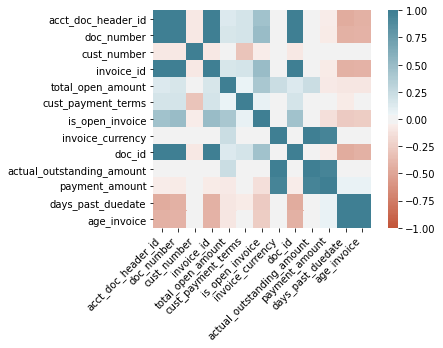

In [ ]:
corr = df.corr()
ax = sb.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sb.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

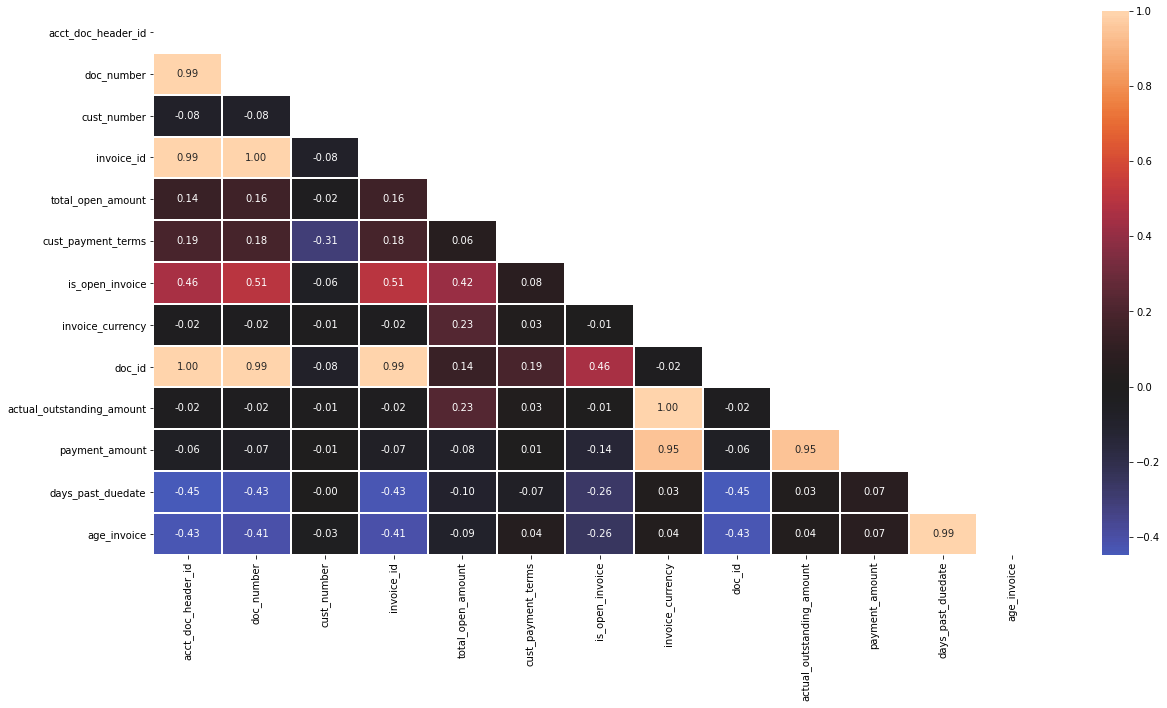

In [ ]:
# Pearson's correlation coefficient (r) is a measure of the strength of the association between the two variables.

corr = df.corr(method ='pearson')
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize = (20,10))
sb.heatmap(corr, mask = mask,  center=0, linewidths = 1, annot = True, fmt = ".2f")
plt.show()


Finding the columns with correlation > 0.8

In [ ]:
corr_matrix = df.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.9
drop = [column for column in upper.columns if any(upper[column] > 0.8)]
drop

['doc_number',
 'invoice_id',
 'doc_id',
 'actual_outstanding_amount',
 'payment_amount',
 'age_invoice']

In [ ]:
drop.remove('payment_amount')
#drop.remove('age_invoice')
df = df.drop(drop, axis = 1)
print(len(df.columns))
df.head()

16


,acct_doc_header_id,business_code,cust_number,name_customer,document_create_date,baseline_create_date,invoice_date_norm,total_open_amount,cust_payment_terms,shipping_date,clear_date,clear_date_norm,is_open_invoice,invoice_currency,payment_amount,days_past_duedate
40665,531519291,minc10,228453,middle man inc,2017-05-01,2017-05-01,2017-05-01,0.0,60,2017-05-01,2017-06-09,2017-06-09,0,29705.48,10079.91,83
40666,531519440,jons3,228111,johnsons and johnsons,2017-05-01,2017-05-01,2017-05-01,0.0,60,2017-05-01,2017-06-12,2017-06-12,0,1848.30,1396.70,112
25877,531533076,holi10,218995,hooli,2017-05-02,2017-05-02,2017-05-02,0.0,60,2017-05-02,2017-06-15,2017-06-15,0,49004.18,49004.18,88
28200,531519166,minc10,228453,middle man inc,2017-05-01,2017-05-01,2017-05-01,0.0,60,2017-05-01,2017-06-15,2017-06-15,0,36376.43,36376.43,89
49519,531596586,minc10,228453,middle man inc,2017-05-08,2017-05-08,2017-05-08,0.0,60,2017-05-08,2017-06-15,2017-06-15,0,37416.03,37416.03,82


In [ ]:
df.shape

(47110, 16)

In [ ]:
#Again check how many values are null
df.isna().sum()

acct_doc_header_id          0
business_code               0
cust_number                 0
name_customer               0
document_create_date        0
baseline_create_date    37239
invoice_date_norm       37239
total_open_amount           0
cust_payment_terms          0
shipping_date           37239
clear_date               5000
clear_date_norm          5000
is_open_invoice             0
invoice_currency            0
payment_amount              0
days_past_duedate           0
dtype: int64

In [ ]:
df.describe

<bound method NDFrame.describe of        acct_doc_header_id business_code  ...  payment_amount days_past_duedate
40665           531519291        minc10  ...        10079.91                83
40666           531519440         jons3  ...         1396.70               112
25877           531533076        holi10  ...        49004.18                88
28200           531519166        minc10  ...        36376.43                89
49519           531596586        minc10  ...        37416.03                82
...                   ...           ...  ...             ...               ...
48550           544833442         syps7  ...            0.00                -4
48551           544938228         seod1  ...            0.00               -18
48552           543696616         enme9  ...         2269.70                23
48553           545790198         cvrp1  ...            0.00               -48
48554           544832533         pier9  ...            0.00                -4

[47110 rows x 16 

In [ ]:
# irrelevant features for the model

features_to_drop = ['acct_doc_header_id', 'name_customer', 'cust_number','clear_date_norm',
                    'shipping_date', 'baseline_create_date', 'invoice_date_norm', 
                    'invoice_date_norm', 'clear_date_norm']

df = df.drop(features_to_drop, axis = 1)
df.head()

,business_code,document_create_date,total_open_amount,cust_payment_terms,clear_date,is_open_invoice,invoice_currency,payment_amount,days_past_duedate
40665,minc10,2017-05-01,0.0,60,2017-06-09,0,29705.48,10079.91,83
40666,jons3,2017-05-01,0.0,60,2017-06-12,0,1848.30,1396.70,112
25877,holi10,2017-05-02,0.0,60,2017-06-15,0,49004.18,49004.18,88
28200,minc10,2017-05-01,0.0,60,2017-06-15,0,36376.43,36376.43,89
49519,minc10,2017-05-08,0.0,60,2017-06-15,0,37416.03,37416.03,82


In [ ]:
df.shape

(47110, 9)

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47110 entries, 40665 to 48554
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   business_code         47110 non-null  object        
 1   document_create_date  47110 non-null  datetime64[ns]
 2   total_open_amount     47110 non-null  float64       
 3   cust_payment_terms    47110 non-null  int64         
 4   clear_date            42110 non-null  datetime64[ns]
 5   is_open_invoice       47110 non-null  int64         
 6   invoice_currency      47110 non-null  float64       
 7   payment_amount        47110 non-null  float64       
 8   days_past_duedate     47110 non-null  int64         
dtypes: datetime64[ns](2), float64(3), int64(3), object(1)
memory usage: 3.6+ MB
None


In [ ]:
print(len(df.business_code.value_counts()))  # Unique business code for each customer

50


**Train Test Split**

In [ ]:
train = df[~df.clear_date.isnull()].copy()
test = df[df.clear_date.isnull()].copy()
print(train.shape, test.shape)

(42110, 9) (5000, 9)


9 relevant features we finally get. These can be converted to useful columns

In [ ]:
# Convert argument to timedelta.
test['clear_date'] = test['document_create_date'] + pd.to_timedelta(test['cust_payment_terms'] + test['days_past_duedate'], unit='d')

In [ ]:
test.head()

,business_code,document_create_date,total_open_amount,cust_payment_terms,clear_date,is_open_invoice,invoice_currency,payment_amount,days_past_duedate
43555,pier9,2019-07-16,582.71,60,2019-08-06,1,582.71,0.00,-39
43556,pier9,2019-07-11,13466.69,60,2019-08-06,1,13466.69,0.00,-34
43557,enme9,2019-03-19,0.00,75,2019-06-25,0,758.68,758.68,23
43558,nuus8,2019-06-08,732.98,60,2019-08-06,1,732.98,0.00,-1
43559,pier9,2019-07-03,3022.33,60,2019-08-06,1,3022.33,0.00,-26


Text(0.5, 1.0, 'Box Plot of Due Date')

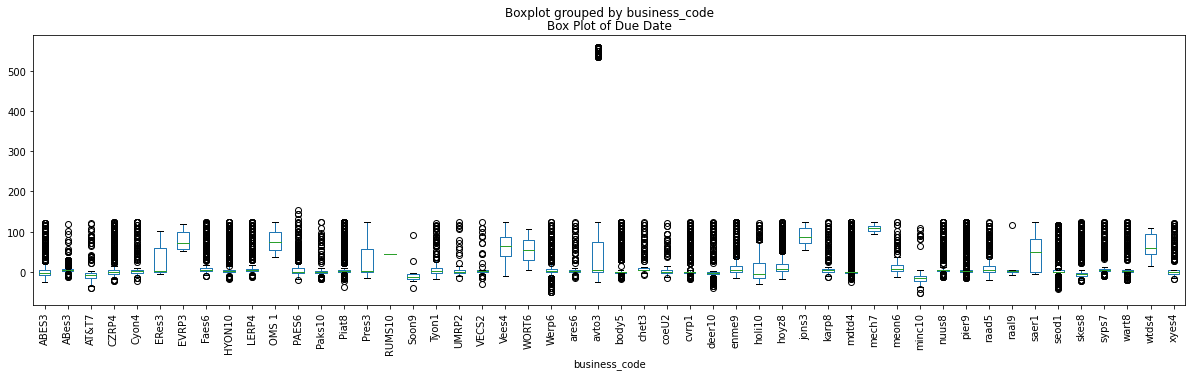

In [ ]:
chart = train.boxplot(by ='business_code', column = ['days_past_duedate'], grid = False, figsize = (20,5))
chart.set_xticklabels(chart.get_xticklabels(), rotation = 90)
chart.set_title('Box Plot of Due Date')

**Create New Features from Existing**

In [ ]:
train['paying_date'] = train['clear_date'] - pd.to_timedelta(train['days_past_duedate'], unit='d')
test['paying_date'] = test['clear_date'] - pd.to_timedelta(test['days_past_duedate'], unit='d')
train['days_taken_to_pay'] = (train['clear_date'] - train['document_create_date']).dt.days
test['days_taken_to_pay'] = (test['clear_date'] - test['document_create_date']).dt.days
train['has_exceeded_due'] = (train['paying_date'] > train['clear_date']).astype('int64')
test['has_exceeded_due'] = (test['paying_date'] > test['clear_date']).astype('int64')

total_open_amount = test['total_open_amount'].copy()

train = train.drop(['is_open_invoice', 'total_open_amount'], axis = 1)
test = test.drop(['is_open_invoice', 'invoice_currency'], axis = 1)

train.rename(columns = {'invoice_currency':'to_pay'}, inplace = True)
test.rename(columns = {'total_open_amount':'to_pay'}, inplace = True)

In [ ]:
train.head()

,business_code,document_create_date,cust_payment_terms,clear_date,to_pay,payment_amount,days_past_duedate,paying_date,days_taken_to_pay,has_exceeded_due
40665,minc10,2017-05-01,60,2017-06-09,29705.48,10079.91,83,2017-03-18,39,0
40666,jons3,2017-05-01,60,2017-06-12,1848.30,1396.70,112,2017-02-20,42,0
25877,holi10,2017-05-02,60,2017-06-15,49004.18,49004.18,88,2017-03-19,44,0
28200,minc10,2017-05-01,60,2017-06-15,36376.43,36376.43,89,2017-03-18,45,0
49519,minc10,2017-05-08,60,2017-06-15,37416.03,37416.03,82,2017-03-25,38,0


In [ ]:
test.head()

,business_code,document_create_date,to_pay,cust_payment_terms,clear_date,payment_amount,days_past_duedate,paying_date,days_taken_to_pay,has_exceeded_due
43555,pier9,2019-07-16,582.71,60,2019-08-06,0.00,-39,2019-09-14,21,1
43556,pier9,2019-07-11,13466.69,60,2019-08-06,0.00,-34,2019-09-09,26,1
43557,enme9,2019-03-19,0.00,75,2019-06-25,758.68,23,2019-06-02,98,0
43558,nuus8,2019-06-08,732.98,60,2019-08-06,0.00,-1,2019-08-07,59,1
43559,pier9,2019-07-03,3022.33,60,2019-08-06,0.00,-26,2019-09-01,34,1


In [ ]:
train = pd.get_dummies(train, columns = ['business_code'] , prefix_sep = "_", drop_first = True)
test = pd.get_dummies(test, columns = ['business_code'] , prefix_sep = "_", drop_first = True)
train, test = train.align(test, join='inner', axis = 1)
train.head()


,document_create_date,cust_payment_terms,clear_date,to_pay,payment_amount,days_past_duedate,paying_date,days_taken_to_pay,has_exceeded_due,business_code_ABes3,business_code_AT&T7,business_code_CZRP4,business_code_Cyon4,business_code_ERes3,business_code_Faes6,business_code_HYON10,business_code_LERP4,business_code_PAES6,business_code_Paks10,business_code_Piat8,business_code_Pres3,business_code_Soon9,business_code_Tyon1,business_code_UMRP2,business_code_VECS2,business_code_Vees4,business_code_Werp6,business_code_ares6,business_code_avto3,business_code_body5,business_code_chet3,business_code_coeU2,business_code_cvrp1,business_code_deer10,business_code_enme9,business_code_holi10,business_code_hoyz8,business_code_karp8,business_code_mdtd4,business_code_meon6,business_code_minc10,business_code_nuus8,business_code_pier9,business_code_raad5,business_code_raal9,business_code_saer1,business_code_seod1,business_code_skes8,business_code_syps7,business_code_wart8,business_code_wtds4,business_code_xyes4
40665,2017-05-01,60,2017-06-09,29705.48,10079.91,83,2017-03-18,39,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
40666,2017-05-01,60,2017-06-12,1848.30,1396.70,112,2017-02-20,42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
25877,2017-05-02,60,2017-06-15,49004.18,49004.18,88,2017-03-19,44,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
28200,2017-05-01,60,2017-06-15,36376.43,36376.43,89,2017-03-18,45,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
49519,2017-05-08,60,2017-06-15,37416.03,37416.03,82,2017-03-25,38,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
test.tail()

,document_create_date,cust_payment_terms,clear_date,to_pay,payment_amount,days_past_duedate,paying_date,days_taken_to_pay,has_exceeded_due,business_code_ABes3,business_code_AT&T7,business_code_CZRP4,business_code_Cyon4,business_code_ERes3,business_code_Faes6,business_code_HYON10,business_code_LERP4,business_code_PAES6,business_code_Paks10,business_code_Piat8,business_code_Pres3,business_code_Soon9,business_code_Tyon1,business_code_UMRP2,business_code_VECS2,business_code_Vees4,business_code_Werp6,business_code_ares6,business_code_avto3,business_code_body5,business_code_chet3,business_code_coeU2,business_code_cvrp1,business_code_deer10,business_code_enme9,business_code_holi10,business_code_hoyz8,business_code_karp8,business_code_mdtd4,business_code_meon6,business_code_minc10,business_code_nuus8,business_code_pier9,business_code_raad5,business_code_raal9,business_code_saer1,business_code_seod1,business_code_skes8,business_code_syps7,business_code_wart8,business_code_wtds4,business_code_xyes4
48550,2019-06-11,60,2019-08-06,3749.95,0.0,-4,2019-08-10,56,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
48551,2019-06-18,67,2019-08-06,57.60,0.0,-18,2019-08-24,49,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
48552,2019-03-19,75,2019-06-25,0.00,2269.7,23,2019-06-02,98,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
48553,2019-07-25,60,2019-08-06,5957.75,0.0,-48,2019-09-23,12,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
48554,2019-06-11,60,2019-08-06,7970.32,0.0,-4,2019-08-10,56,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


Plots to understand  train data wrt payment amount and days past due date

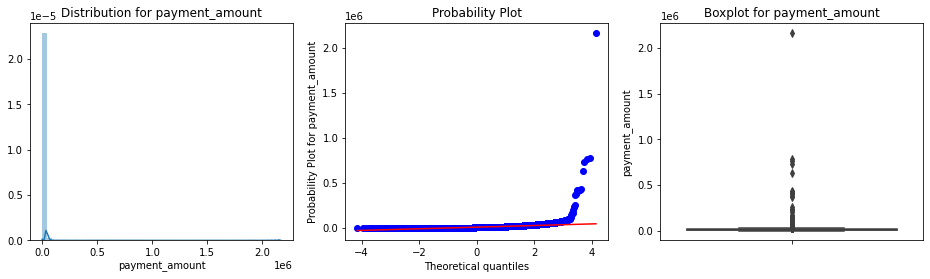

In [ ]:
plotter_analyser(train, 'payment_amount')

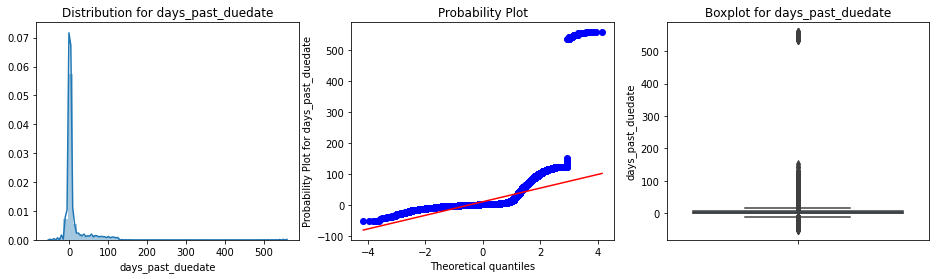

In [ ]:
plotter_analyser(train, 'days_past_duedate')

Before Scaling 

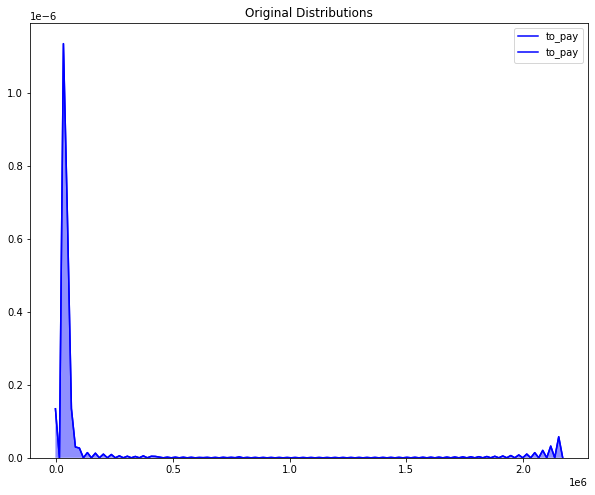

In [ ]:
fig, ax1 = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('Original Distributions')

sb.kdeplot(train['to_pay'], ax = ax1, color='b', shade=True)
sb.kdeplot(train['to_pay'], ax = ax1, color='b', shade=True)


**Scaling Data using Standard Scalar**

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(train[['to_pay']])
train['to_pay_scaled'] = scaler.transform(train[['to_pay']])
test['to_pay_scaled'] = scaler.transform(test[['to_pay']])

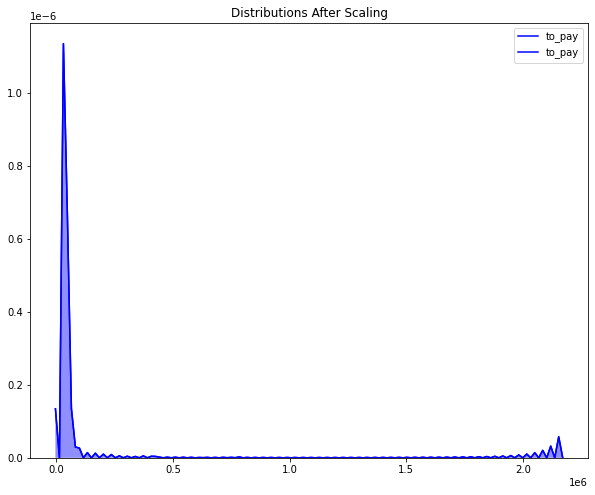

In [ ]:
fig, ax1 = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('Distributions After Scaling')

sb.kdeplot(train['to_pay'], ax = ax1, color='b', shade=True,)
sb.kdeplot(train['to_pay'], ax = ax1, color='b', shade=True)

In [ ]:
df.to_csv('cleaned_dataset.csv', index = True)

In [ ]:
features = list(train.columns.values)
features.remove('payment_amount')

In [ ]:
remove = ['document_create_date', 'clear_date', 'paying_date', 'cust_payment_terms', 'to_pay']
features = [x for x in features if x not in remove]
target = 'payment_amount'

In [ ]:
train.shape

(42110, 53)

In [ ]:
df.to_pickle('D:\High Radius Internship\Phase-1\Day7\Final Prediction\dataframe')
train.to_pickle('D:\High Radius Internship\Phase-1\Day7\Final Prediction\train')
test.to_pickle('D:\High Radius Internship\Phase-1\Day7\Final Prediction\test')
total_open_amount.to_pickle('D:\High Radius Internship\Phase-1\Day7\Final Prediction\total_open_amount_test')


In [ ]:
train.head()

,document_create_date,cust_payment_terms,clear_date,to_pay,payment_amount,days_past_duedate,paying_date,days_taken_to_pay,has_exceeded_due,business_code_ABes3,business_code_AT&T7,business_code_CZRP4,business_code_Cyon4,business_code_ERes3,business_code_Faes6,business_code_HYON10,business_code_LERP4,business_code_PAES6,business_code_Paks10,business_code_Piat8,business_code_Pres3,business_code_Soon9,business_code_Tyon1,business_code_UMRP2,business_code_VECS2,business_code_Vees4,business_code_Werp6,business_code_ares6,business_code_avto3,business_code_body5,business_code_chet3,business_code_coeU2,business_code_cvrp1,business_code_deer10,business_code_enme9,business_code_holi10,business_code_hoyz8,business_code_karp8,business_code_mdtd4,business_code_meon6,business_code_minc10,business_code_nuus8,business_code_pier9,business_code_raad5,business_code_raal9,business_code_saer1,business_code_seod1,business_code_skes8,business_code_syps7,business_code_wart8,business_code_wtds4,business_code_xyes4,to_pay_scaled
40665,2017-05-01,60,2017-06-09,29705.48,10079.91,83,2017-03-18,39,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1.251626
40666,2017-05-01,60,2017-06-12,1848.30,1396.70,112,2017-02-20,42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.389926
25877,2017-05-02,60,2017-06-15,49004.18,49004.18,88,2017-03-19,44,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.388849
28200,2017-05-01,60,2017-06-15,36376.43,36376.43,89,2017-03-18,45,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1.644728
49519,2017-05-08,60,2017-06-15,37416.03,37416.03,82,2017-03-25,38,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1.705989


**Implementing Models**


**1) Linear Model**

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn import metrics
from sklearn.linear_model import RidgeCV

rr = RidgeCV(alphas = [0.1, 1.0, 10.0])

In [ ]:
scores = cross_validate(rr, train[features], 
                         train[target], cv=10, scoring=['r2','neg_mean_absolute_error'], verbose = 10)
scores

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  ................................................................
[CV] ..... , neg_mean_absolute_error=-409.194, r2=0.988, total=   0.2s
[CV]  ................................................................
[CV] ..... , neg_mean_absolute_error=-608.746, r2=0.984, total=   0.2s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.4s remaining:    0.0s


[CV] ..... , neg_mean_absolute_error=-569.819, r2=0.964, total=   0.2s
[CV]  ................................................................
[CV] ..... , neg_mean_absolute_error=-467.227, r2=0.991, total=   0.2s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.7s remaining:    0.0s


[CV] ..... , neg_mean_absolute_error=-400.849, r2=0.998, total=   0.2s
[CV]  ................................................................
[CV] ..... , neg_mean_absolute_error=-376.602, r2=0.982, total=   0.2s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    1.1s remaining:    0.0s


[CV] ..... , neg_mean_absolute_error=-371.047, r2=0.983, total=   0.2s
[CV]  ................................................................
[CV] ..... , neg_mean_absolute_error=-391.499, r2=0.993, total=   0.2s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    1.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    1.5s remaining:    0.0s


[CV] ..... , neg_mean_absolute_error=-311.962, r2=0.994, total=   0.2s
[CV]  ................................................................
[CV] ..... , neg_mean_absolute_error=-277.133, r2=0.985, total=   0.2s


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    1.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.8s finished


{'fit_time': array([0.20139027, 0.17186332, 0.17732096, 0.1674881 , 0.16612267,
        0.17585516, 0.17547274, 0.16762471, 0.19131112, 0.17658734]),
 'score_time': array([0.0118072 , 0.00325131, 0.00328255, 0.00342488, 0.01373959,
        0.00331497, 0.00328541, 0.00325704, 0.00335336, 0.00343633]),
 'test_neg_mean_absolute_error': array([-409.19441404, -608.74617097, -569.81897535, -467.22681217,
        -400.84864289, -376.60230303, -371.04732077, -391.49864125,
        -311.96225877, -277.13305914]),
 'test_r2': array([0.98831169, 0.9843212 , 0.96447306, 0.99050004, 0.99826862,
        0.98180151, 0.98267867, 0.99256768, 0.99445892, 0.98470359])}

In [ ]:
print(scores['test_r2'].mean(),scores['test_neg_mean_absolute_error'].mean())

0.9862084970440493 -418.40785983815124


**First Payment Prediction using Linear Model**

In [ ]:
from sklearn.model_selection import cross_val_predict

predictions = cross_val_predict(rr, train[features], train[target])

pd.DataFrame({'Paid (Observed)': train['payment_amount'], 
              'First Payment (Predicted)':  np.clip(predictions, a_min = 0, a_max = train['to_pay'])})

,Paid (Observed),First Payment (Predicted)
40665,10079.91,29705.480000
40666,1396.70,1848.300000
25877,49004.18,48808.403354
28200,36376.43,36376.430000
49519,37416.03,37416.030000
...,...,...
24911,16875.12,16814.909992
14344,4083.72,4083.720000
28920,3638.22,3638.220000
11351,8757.54,8744.902207


In [ ]:
def compare_plot(df, target, predictions):
    y = df[target]
    fig, ax = plt.subplots(ncols = 1, figsize=(10, 8))
    ax.scatter(y, predictions)
    ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
    ax.set_xlabel('Obsereved')
    ax.set_ylabel('Predicted')
    plt.show()

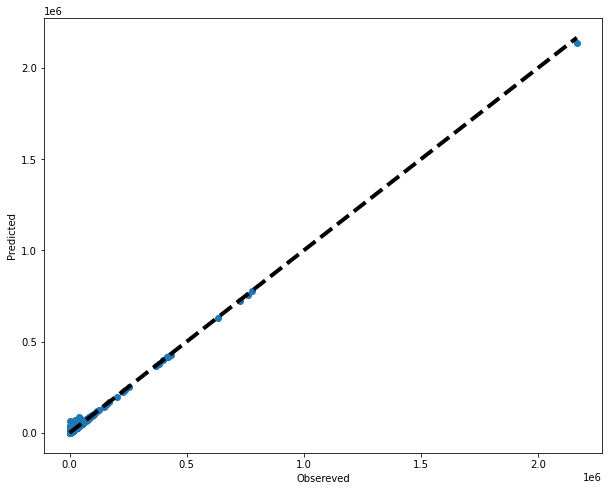

In [ ]:
compare_plot(train, target, predictions)


**2) Ridge Regressor**

In [ ]:
rr.fit(train[features], train[target])
RidgeCV(alphas={0.1,  1. , 10. }, cv=None, fit_intercept=True,
        gcv_mode=None, normalize=False, scoring=None, store_cv_values=False)

RidgeCV(alphas=array({0.1, 1.0, 10.0}, dtype=object), cv=None,
        fit_intercept=True, gcv_mode=None, normalize=False, scoring=None,
        store_cv_values=False)

**First Payment Prediction using Ridge Regressor**

In [ ]:
predictions_test = rr.predict(test[features])
#pd.DataFrame({'Open Amount': total_open_amount,
#              'First Payment (Predicted)': predictions_test})
pd.DataFrame({'Open Amount': total_open_amount,
              'First Payment (Predicted)': np.clip(predictions_test, a_min = 0, a_max = test['to_pay'])})

,Open Amount,First Payment (Predicted)
43555,582.71,0.000000
43556,13466.69,12680.138868
43557,0.00,0.000000
43558,732.98,94.039307
43559,3022.33,2347.040884
...,...,...
48550,3749.95,3056.332841
48551,57.60,0.000000
48552,0.00,0.000000
48553,5957.75,5440.774316


Regression Fails to predict many payments

In [ ]:

import pickle

with open('D:\High Radius Internship\Phase-1\Day7\Final Prediction', 'wb') as f:
    pickle.dump(features, f)
    
with open('D:\High Radius Internship\Phase-1\Day7\Final Prediction', 'wb') as f:
    pickle.dump(target, f)


In [ ]:
test[features].head()

,days_past_duedate,days_taken_to_pay,has_exceeded_due,business_code_ABes3,business_code_AT&T7,business_code_CZRP4,business_code_Cyon4,business_code_ERes3,business_code_Faes6,business_code_HYON10,business_code_LERP4,business_code_PAES6,business_code_Paks10,business_code_Piat8,business_code_Pres3,business_code_Soon9,business_code_Tyon1,business_code_UMRP2,business_code_VECS2,business_code_Vees4,business_code_Werp6,business_code_ares6,business_code_avto3,business_code_body5,business_code_chet3,business_code_coeU2,business_code_cvrp1,business_code_deer10,business_code_enme9,business_code_holi10,business_code_hoyz8,business_code_karp8,business_code_mdtd4,business_code_meon6,business_code_minc10,business_code_nuus8,business_code_pier9,business_code_raad5,business_code_raal9,business_code_saer1,business_code_seod1,business_code_skes8,business_code_syps7,business_code_wart8,business_code_wtds4,business_code_xyes4,to_pay_scaled
43555,-39,21,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,-0.464504
43556,-34,26,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0.294716
43557,23,98,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.498841
43558,-1,59,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,-0.455649
43559,-26,34,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,-0.320743


**3) Random Forest Regressor**

In [ ]:

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

def rfr_grid_search(X, Y):
# Perform Grid-Search
    gsc = GridSearchCV(
        estimator=RandomForestRegressor(),
        param_grid={
            'max_depth': range(4,9),
            'n_estimators': (10, 50, 100, 1000),
            'max_features': ['auto', 'sqrt', 'log2'],
        },
        cv=5, scoring='neg_mean_squared_error', verbose=10, n_jobs=-1)
    
    return gsc.fit(X, Y)

In [ ]:

grid_result = rfr_grid_search(train[features], train[target])


Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   10.5s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   27.0s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed:  8.0min
[Parallel(n_jobs=-1)]: Done  94 tasks      | elapsed:  8.2min
[Parallel(n_jobs=-1)]: Done 109 tasks      | elapsed:  9.3min
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed: 10.1min
[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed: 14

In [ ]:
grid_result.best_params_

{'max_depth': 7, 'max_features': 'auto', 'n_estimators': 10}

In [ ]:
rfr = RandomForestRegressor(max_depth = grid_result.best_params_["max_depth"], 
                            max_features = grid_result.best_params_["max_features"],
                            n_estimators = grid_result.best_params_["n_estimators"],
                            random_state = False, verbose = 10)

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(rfr, train[features], 
                         train[target], cv=10, scoring='neg_mean_absolute_error')
scores


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


building tree 1 of 10
building tree 2 of 10
building tree 3 of 10


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.4s remaining:    0.0s


building tree 4 of 10
building tree 5 of 10
building tree 6 of 10


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.7s remaining:    0.0s


building tree 7 of 10
building tree 8 of 10
building tree 9 of 10


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elaps

building tree 10 of 10
Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
building tree 1 of 10
building tree 2 of 10


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.3s remaining:    0.0s


building tree 3 of 10
building tree 4 of 10
building tree 5 of 10


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.6s remaining:    0.0s


building tree 6 of 10
building tree 7 of 10
building tree 8 of 10


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elaps

building tree 9 of 10
building tree 10 of 10
Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
building tree 1 of 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.3s remaining:    0.0s


building tree 2 of 10
building tree 3 of 10
building tree 4 of 10


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.5s remaining:    0.0s


building tree 5 of 10
building tree 6 of 10
building tree 7 of 10


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.8s remaining:    0.0s


building tree 8 of 10
building tree 9 of 10
building tree 10 of 10


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 

Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
building tree 1 of 10
building tree 2 of 10
building tree 3 of 10


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.4s remaining:    0.0s


building tree 4 of 10
building tree 5 of 10
building tree 6 of 10


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.7s remaining:    0.0s


building tree 7 of 10
building tree 8 of 10
building tree 9 of 10


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elaps

building tree 10 of 10
Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
building tree 1 of 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.3s remaining:    0.0s


building tree 2 of 10
building tree 3 of 10
building tree 4 of 10


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.5s remaining:    0.0s


building tree 5 of 10
building tree 6 of 10
building tree 7 of 10


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.8s remaining:    0.0s


building tree 8 of 10
building tree 9 of 10
building tree 10 of 10


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 

Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
building tree 1 of 10
building tree 2 of 10
building tree 3 of 10


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.4s remaining:    0.0s


building tree 4 of 10
building tree 5 of 10
building tree 6 of 10


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.7s remaining:    0.0s


building tree 7 of 10
building tree 8 of 10
building tree 9 of 10


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elaps

building tree 10 of 10
Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
building tree 1 of 10
building tree 2 of 10


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.3s remaining:    0.0s


building tree 3 of 10
building tree 4 of 10
building tree 5 of 10


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.6s remaining:    0.0s


building tree 6 of 10
building tree 7 of 10
building tree 8 of 10


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elaps

building tree 9 of 10
building tree 10 of 10
Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
building tree 1 of 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s remaining:    0.0s


building tree 2 of 10
building tree 3 of 10
building tree 4 of 10


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.5s remaining:    0.0s


building tree 5 of 10
building tree 6 of 10
building tree 7 of 10


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.7s remaining:    0.0s


building tree 8 of 10
building tree 9 of 10
building tree 10 of 10


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 

Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
building tree 1 of 10
building tree 2 of 10
building tree 3 of 10


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.4s remaining:    0.0s


building tree 4 of 10
building tree 5 of 10
building tree 6 of 10


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.7s remaining:    0.0s


building tree 7 of 10
building tree 8 of 10
building tree 9 of 10


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elaps

building tree 10 of 10
Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
building tree 1 of 10
building tree 2 of 10


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.3s remaining:    0.0s


building tree 3 of 10
building tree 4 of 10
building tree 5 of 10


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.6s remaining:    0.0s


building tree 6 of 10
building tree 7 of 10
building tree 8 of 10
building tree 9 of 10
building tree 10 of 10
Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elaps

array([-396.74698643, -591.35278099, -505.58170269, -389.16545615,
       -733.51778903, -348.31959053, -377.48997221, -426.64049749,
       -326.84937873, -312.12754761])

In [ ]:
print(scores['test_r2'].mean(),scores['test_neg_mean_absolute_error'].mean())

IndexError: ignored

**3) Cross Value Prediction**

In [ ]:
from sklearn.model_selection import cross_val_predict

predictions = cross_val_predict(rr, train[features], train[target])

In [ ]:
pd.DataFrame({'Paid (Observed)': train['payment_amount'], 
              'First Payment (Predicted)':  np.clip(predictions, a_min = 0, a_max = train['to_pay'])})




,Paid (Observed),First Payment (Predicted)
40665,10079.91,29705.480000
40666,1396.70,1848.300000
25877,49004.18,48808.403354
28200,36376.43,36376.430000
49519,37416.03,37416.030000
...,...,...
24911,16875.12,16814.909992
14344,4083.72,4083.720000
28920,3638.22,3638.220000
11351,8757.54,8744.902207


In [ ]:

def compare_plot(df, target, predictions):
    y = df[target]
    fig, ax = plt.subplots(ncols = 1, figsize=(10, 8))
    ax.scatter(y, predictions)
    ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
    ax.set_xlabel('Obsereved')
    ax.set_ylabel('Predicted')
    plt.show()

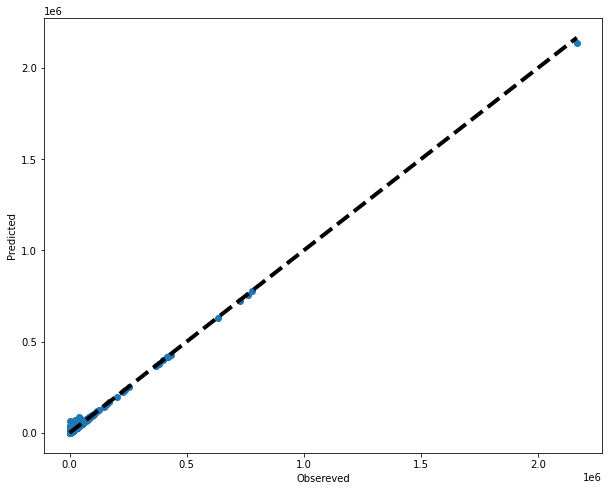

In [ ]:

compare_plot(train, target, predictions)


**Making Test Predictions using Ridge Regressor**

In [ ]:
rr.fit(train[features], train[target])

RidgeCV(alphas=array([ 0.1,  1. , 10. ]), cv=None, fit_intercept=True,
        gcv_mode=None, normalize=False, scoring=None, store_cv_values=False)


RidgeCV(alphas=array([ 0.1,  1. , 10. ]), cv=None, fit_intercept=True,
        gcv_mode=None, normalize=False, scoring=None, store_cv_values=False)

In [ ]:
predictions_test = rr.predict(test[features])
#pd.DataFrame({'Open Amount': total_open_amount,
#              'First Payment (Predicted)': predictions_test})
pd.DataFrame({'Open Amount': total_open_amount,
              'First Payment (Predicted)': np.clip(predictions_test, a_min = 0, a_max = test['to_pay'])})

,Open Amount,First Payment (Predicted)
43555,582.71,0.000000
43556,13466.69,12680.138868
43557,0.00,0.000000
43558,732.98,94.039307
43559,3022.33,2347.040884
...,...,...
48550,3749.95,3056.332841
48551,57.60,0.000000
48552,0.00,0.000000
48553,5957.75,5440.774316


Hence, Regression Fails to predict many payments

In [ ]:
import pickle

with open('D:\High Radius Internship\Phase-1\Day7\Final Prediction\features', 'wb') as f:
    pickle.dump(features, f)
    
with open('D:\High Radius Internship\Phase-1\Day7\Final Prediction\target', 'wb') as f:
    pickle.dump(target, f)




In [ ]:
test[features].head()

,days_past_duedate,days_taken_to_pay,has_exceeded_due,business_code_ABes3,business_code_AT&T7,business_code_CZRP4,business_code_Cyon4,business_code_ERes3,business_code_Faes6,business_code_HYON10,business_code_LERP4,business_code_PAES6,business_code_Paks10,business_code_Piat8,business_code_Pres3,business_code_Soon9,business_code_Tyon1,business_code_UMRP2,business_code_VECS2,business_code_Vees4,business_code_Werp6,business_code_ares6,business_code_avto3,business_code_body5,business_code_chet3,business_code_coeU2,business_code_cvrp1,business_code_deer10,business_code_enme9,business_code_holi10,business_code_hoyz8,business_code_karp8,business_code_mdtd4,business_code_meon6,business_code_minc10,business_code_nuus8,business_code_pier9,business_code_raad5,business_code_raal9,business_code_saer1,business_code_seod1,business_code_skes8,business_code_syps7,business_code_wart8,business_code_wtds4,business_code_xyes4,to_pay_scaled
43555,-39,21,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,-0.464504
43556,-34,26,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0.294716
43557,23,98,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.498841
43558,-1,59,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,-0.455649
43559,-26,34,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,-0.320743


**4) Random Forest Regressor**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

def rfr_grid_search(X, Y):
# Perform Grid-Search
    gsc = GridSearchCV(
        estimator=RandomForestRegressor(),
        param_grid={
            'max_depth': range(4,9),
            'n_estimators': (10, 50, 100, 1000),
            'max_features': ['auto', 'sqrt', 'log2'],
        },
        cv=5, scoring='neg_mean_squared_error', verbose=10, n_jobs=-1)
    
    return gsc.fit(X, Y)

Use Grid Search to find the best Hyper-Parameters


In [ ]:
grid_result = rfr_grid_search(train[features], train[target])

Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    8.9s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   25.1s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed:  8.0min
[Parallel(n_jobs=-1)]: Done  94 tasks      | elapsed:  8.3min
[Parallel(n_jobs=-1)]: Done 109 tasks      | elapsed:  9.4min
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed: 10.2min
[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed: 14

KeyboardInterrupt: ignored

In [ ]:
grid_result.best_params_

{'max_depth': 7, 'max_features': 'auto', 'n_estimators': 10}

In [ ]:
rfr = RandomForestRegressor(max_depth = grid_result.best_params_["max_depth"], 
                            max_features = grid_result.best_params_["max_features"],
                            n_estimators = grid_result.best_params_["n_estimators"],
                            random_state = False, verbose = 10)

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(rfr, train[features], 
                         train[target], cv=10, scoring='neg_mean_absolute_error')
scores


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


building tree 1 of 10
building tree 2 of 10
building tree 3 of 10


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.4s remaining:    0.0s


building tree 4 of 10
building tree 5 of 10
building tree 6 of 10


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.7s remaining:    0.0s


building tree 7 of 10
building tree 8 of 10
building tree 9 of 10


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elaps

building tree 10 of 10
Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
building tree 1 of 10
building tree 2 of 10


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.3s remaining:    0.0s


building tree 3 of 10
building tree 4 of 10
building tree 5 of 10


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.6s remaining:    0.0s


building tree 6 of 10
building tree 7 of 10
building tree 8 of 10


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elaps

building tree 9 of 10
building tree 10 of 10
Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
building tree 1 of 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.3s remaining:    0.0s


building tree 2 of 10
building tree 3 of 10
building tree 4 of 10


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.5s remaining:    0.0s


building tree 5 of 10
building tree 6 of 10
building tree 7 of 10


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.8s remaining:    0.0s


building tree 8 of 10
building tree 9 of 10
building tree 10 of 10


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 

Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
building tree 1 of 10
building tree 2 of 10
building tree 3 of 10


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.4s remaining:    0.0s


building tree 4 of 10
building tree 5 of 10
building tree 6 of 10


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.7s remaining:    0.0s


building tree 7 of 10
building tree 8 of 10
building tree 9 of 10


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elaps

building tree 10 of 10
Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
building tree 1 of 10
building tree 2 of 10


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.4s remaining:    0.0s


building tree 3 of 10
building tree 4 of 10
building tree 5 of 10


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.6s remaining:    0.0s


building tree 6 of 10
building tree 7 of 10
building tree 8 of 10


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elaps

building tree 9 of 10
building tree 10 of 10
Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.3s remaining:    0.0s


building tree 1 of 10
building tree 2 of 10
building tree 3 of 10
building tree 4 of 10


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.5s remaining:    0.0s


building tree 5 of 10
building tree 6 of 10
building tree 7 of 10


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.8s remaining:    0.0s


building tree 8 of 10
building tree 9 of 10
building tree 10 of 10


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 

Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
building tree 1 of 10
building tree 2 of 10
building tree 3 of 10


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.4s remaining:    0.0s


building tree 4 of 10
building tree 5 of 10
building tree 6 of 10


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.7s remaining:    0.0s


building tree 7 of 10
building tree 8 of 10
building tree 9 of 10


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elaps

building tree 10 of 10
Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
building tree 1 of 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.3s remaining:    0.0s


building tree 2 of 10
building tree 3 of 10
building tree 4 of 10


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.5s remaining:    0.0s


building tree 5 of 10
building tree 6 of 10
building tree 7 of 10


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.8s remaining:    0.0s


building tree 8 of 10
building tree 9 of 10
building tree 10 of 10


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 

Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
building tree 1 of 10
building tree 2 of 10
building tree 3 of 10


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.4s remaining:    0.0s


building tree 4 of 10
building tree 5 of 10
building tree 6 of 10


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.7s remaining:    0.0s


building tree 7 of 10
building tree 8 of 10
building tree 9 of 10


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elaps

building tree 10 of 10
Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
building tree 1 of 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.3s remaining:    0.0s


building tree 2 of 10
building tree 3 of 10
building tree 4 of 10


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.5s remaining:    0.0s


building tree 5 of 10
building tree 6 of 10
building tree 7 of 10


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.8s remaining:    0.0s


building tree 8 of 10
building tree 9 of 10
building tree 10 of 10
Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


array([-396.74698643, -591.35278099, -505.58170269, -389.16545615,
       -733.51778903, -348.31959053, -377.48997221, -426.64049749,
       -326.84937873, -312.12754761])

In [ ]:

from sklearn.model_selection import cross_validate

scores = cross_validate(rfr, train[features], 
                         train[target], cv=10, scoring=['r2','neg_mean_absolute_error'], verbose = 10)
scores


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


[CV]  ................................................................
building tree 1 of 10
building tree 2 of 10
building tree 3 of 10


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.4s remaining:    0.0s


building tree 4 of 10
building tree 5 of 10
building tree 6 of 10


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.7s remaining:    0.0s


building tree 7 of 10
building tree 8 of 10
building tree 9 of 10


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elaps

building tree 10 of 10
Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
[CV] ..... , neg_mean_absolute_error=-396.747, r2=0.988, total=   0.9s
[CV]  ................................................................
building tree 1 of 10
building tree 2 of 10


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.3s remaining:    0.0s


building tree 3 of 10
building tree 4 of 10
building tree 5 of 10


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.6s remaining:    0.0s


building tree 6 of 10
building tree 7 of 10
building tree 8 of 10


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elaps

building tree 9 of 10
building tree 10 of 10
Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
[CV] ..... , neg_mean_absolute_error=-591.353, r2=0.983, total=   0.9s
[CV]  ................................................................
building tree 1 of 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.3s remaining:    0.0s


building tree 2 of 10
building tree 3 of 10
building tree 4 of 10


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.5s remaining:    0.0s


building tree 5 of 10
building tree 6 of 10
building tree 7 of 10


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.8s remaining:    0.0s


building tree 8 of 10
building tree 9 of 10
building tree 10 of 10


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.7

Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
[CV] ..... , neg_mean_absolute_error=-505.582, r2=0.964, total=   0.9s
[CV]  ................................................................
building tree 1 of 10
building tree 2 of 10
building tree 3 of 10


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.4s remaining:    0.0s


building tree 4 of 10
building tree 5 of 10
building tree 6 of 10


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.7s remaining:    0.0s


building tree 7 of 10
building tree 8 of 10
building tree 9 of 10


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elaps

building tree 10 of 10
Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
[CV] ..... , neg_mean_absolute_error=-389.165, r2=0.977, total=   0.9s
[CV]  ................................................................
building tree 1 of 10
building tree 2 of 10


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.3s remaining:    0.0s


building tree 3 of 10
building tree 4 of 10
building tree 5 of 10


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.6s remaining:    0.0s


building tree 6 of 10
building tree 7 of 10
building tree 8 of 10


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elaps

building tree 9 of 10
building tree 10 of 10
Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
[CV] ..... , neg_mean_absolute_error=-733.518, r2=0.602, total=   0.9s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


building tree 1 of 10
building tree 2 of 10
building tree 3 of 10


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.5s remaining:    0.0s


building tree 4 of 10
building tree 5 of 10
building tree 6 of 10


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.7s remaining:    0.0s


building tree 7 of 10
building tree 8 of 10
building tree 9 of 10


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elaps

building tree 10 of 10
Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
[CV] ..... , neg_mean_absolute_error=-348.320, r2=0.982, total=   0.9s
[CV]  ................................................................
building tree 1 of 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.3s remaining:    0.0s


building tree 2 of 10
building tree 3 of 10
building tree 4 of 10


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.5s remaining:    0.0s


building tree 5 of 10
building tree 6 of 10
building tree 7 of 10


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.8s remaining:    0.0s


building tree 8 of 10
building tree 9 of 10
building tree 10 of 10


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    6.2

Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
[CV] ..... , neg_mean_absolute_error=-377.490, r2=0.974, total=   0.9s
[CV]  ................................................................
building tree 1 of 10
building tree 2 of 10
building tree 3 of 10


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.4s remaining:    0.0s


building tree 4 of 10
building tree 5 of 10
building tree 6 of 10


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.7s remaining:    0.0s


building tree 7 of 10
building tree 8 of 10
building tree 9 of 10


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elaps

building tree 10 of 10
Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
[CV] ..... , neg_mean_absolute_error=-426.640, r2=0.985, total=   0.9s
[CV]  ................................................................
building tree 1 of 10
building tree 2 of 10


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.3s remaining:    0.0s


building tree 3 of 10
building tree 4 of 10
building tree 5 of 10


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.6s remaining:    0.0s


building tree 6 of 10
building tree 7 of 10
building tree 8 of 10


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elaps

building tree 9 of 10
building tree 10 of 10
Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
[CV] ..... , neg_mean_absolute_error=-326.849, r2=0.990, total=   0.9s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


building tree 1 of 10
building tree 2 of 10
building tree 3 of 10


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.4s remaining:    0.0s


building tree 4 of 10
building tree 5 of 10
building tree 6 of 10


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.7s remaining:    0.0s


building tree 7 of 10
building tree 8 of 10
building tree 9 of 10
building tree 10 of 10
Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
[CV] ..... , neg_mean_absolute_error=-312.128, r2=0.984, total=   0.9s


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elaps

{'fit_time': array([0.87677908, 0.88325238, 0.87755084, 0.87358212, 0.88130426,
        0.89497638, 0.88326979, 0.86995459, 0.88474393, 0.87316751]),
 'score_time': array([0.00841975, 0.00826025, 0.00825453, 0.00824189, 0.00821662,
        0.00811362, 0.00825667, 0.00831127, 0.00799346, 0.0079608 ]),
 'test_neg_mean_absolute_error': array([-396.74698643, -591.35278099, -505.58170269, -389.16545615,
        -733.51778903, -348.31959053, -377.48997221, -426.64049749,
        -326.84937873, -312.12754761]),
 'test_r2': array([0.98798331, 0.98263838, 0.96416348, 0.97727528, 0.60183895,
        0.98200065, 0.97394372, 0.984914  , 0.99016438, 0.98385042])}

In [ ]:
print(scores['test_r2'].mean(),scores['test_neg_mean_absolute_error'].mean())

0.9428772577360618 -440.7791701879172


**Scores**

In [ ]:
pd.DataFrame({'Train Actual': train['payment_amount'],
              'First Payment (Predicted)': pred})

NameError: ignored

In [ ]:
rfr.fit(train[features], train[target])

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


building tree 1 of 10
building tree 2 of 10
building tree 3 of 10


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.5s remaining:    0.0s


building tree 4 of 10
building tree 5 of 10
building tree 6 of 10


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.8s remaining:    0.0s


building tree 7 of 10
building tree 8 of 10
building tree 9 of 10
building tree 10 of 10


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.0s finished


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=7, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=False, verbose=10, warm_start=False)

In [ ]:
RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=8, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=False, verbose=10, warm_start=False)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=8, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=False, verbose=10, warm_start=False)

In [ ]:
compare_plot(train, target, pred)

NameError: ignored

**Accuracy is better than Ridge RegressioN**

 Test Predictions using Random Forest Regressor

In [ ]:
pred_rfr = rfr.predict(test[features])

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


In [ ]:
test_results = pd.DataFrame({'Test Open Amount': total_open_amount,
              'First Payment (Predicted)': np.clip(pred_rfr, a_min = 0, a_max = total_open_amount)})
test_results

,Test Open Amount,First Payment (Predicted)
43555,582.71,582.710000
43556,13466.69,11590.304734
43557,0.00,0.000000
43558,732.98,732.980000
43559,3022.33,2500.849510
...,...,...
48550,3749.95,3731.811609
48551,57.60,57.600000
48552,0.00,0.000000
48553,5957.75,3368.144836


Predictions seem to be better than Ridge regression, hence, we chose Random Forest.